# Linear Algebra (**`scipy.linalg`**)

Documentation Link: https://docs.scipy.org/doc/scipy/tutorial/linalg.html

In [31]:
import numpy as np
import numpy.linalg as nlalg
import scipy as scp
import scipy.linalg as slalg
import matplotlib.pyplot as plt

## [numpy.matrix vs 2-D numpy.ndarray](https://docs.scipy.org/doc/scipy/tutorial/linalg.html#numpy-matrix-vs-2-d-numpy-ndarray)

In [6]:
Amat = np.mat([[1,2],[3,4]]) # or np.mat('[1 2;3 4]')
display(Amat, Amat.__class__, 'inv', Amat.I, Amat.I*Amat)
bmat = np.mat([5, 6])  # or np.mat('[5 6]')
display(bmat, bmat.T, Amat*bmat.T)

matrix([[1, 2],
        [3, 4]])

numpy.matrix

'inv'

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

matrix([[1.00000000e+00, 0.00000000e+00],
        [1.11022302e-16, 1.00000000e+00]])

matrix([[5, 6]])

matrix([[5],
        [6]])

matrix([[17],
        [39]])

Despite its convenience, the use of the numpy.matrix class is discouraged, since it adds nothing that cannot be accomplished with 2-D numpy.ndarray objects, and may lead to a confusion of which class is being used. 

In [8]:
A = np.array([[1,2],[3,4]])
b = np.array([[5,6]]) #2D array
display('A', A, 'b', b, 'b.T', b.T)
display('not matrix multiplication!', A*b, 
        'matrix multiplication', A.dot(b.T))
b = np.array([5,6]) 
display('1D array', b, 'not matrix transpose!', b.T, 
        'does not matter for multiplication', A.dot(b))

'A'

array([[1, 2],
       [3, 4]])

'b'

array([[5, 6]])

'b.T'

array([[5],
       [6]])

'not matrix multiplication!'

array([[ 5, 12],
       [15, 24]])

'matrix multiplication'

array([[17],
       [39]])

'1D array'

array([5, 6])

'not matrix transpose!'

array([5, 6])

'does not matter for multiplication'

array([17, 39])

## [Basic Routines](https://docs.scipy.org/doc/scipy/tutorial/linalg.html#basic-routines)

### Finding the inverse

In [9]:
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
display(A, 'inv', nlalg.inv(A), slalg.inv(A), 'double check', 
            A.dot(nlalg.inv(A)), slalg.inv(A).dot(A))

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

'inv'

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

'double check'

array([[ 1.00000000e+00,  1.11022302e-16, -6.24500451e-17],
       [-1.38777878e-16,  1.00000000e+00, -1.45716772e-16],
       [-2.22044605e-16,  0.00000000e+00,  1.00000000e+00]])

array([[1.00000000e+00, 3.33066907e-16, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 4.44089210e-16],
       [1.38777878e-17, 6.93889390e-18, 1.00000000e+00]])

In [12]:
# %timeit A.dot(nlalg.inv(A))

23.5 µs ± 1.81 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
# %timeit A.dot(slalg.inv(A)) # pretty fast

5.21 µs ± 291 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Solving a linear System

In [14]:
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
b = np.array([[10],[8],[3]])
X1 = slalg.inv(A).dot(b)
X2 = slalg.solve(A, b)
display(X1, X2, 'check', A.dot(X1)-b, A.dot(X2)-b)

array([[-9.28],
       [ 5.16],
       [ 0.76]])

array([[-9.28],
       [ 5.16],
       [ 0.76]])

'check'

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-8.88178420e-16]])

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-1.77635684e-15]])

In [17]:
# %timeit slalg.inv(A).dot(b)

4.86 µs ± 193 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [20]:
# %timeit nlalg.solve(A, b) # fastest

3.52 µs ± 63.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [21]:
# %timeit slalg.solve(A, b)

8.3 µs ± 73.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Finding the determinant

In [28]:
A = np.array([[1,2],[3,4]])
slalg.det(A)

-2.0

In [29]:
# %timeit nlalg.det(A)

2.6 µs ± 35.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [30]:
# %timeit slalg.det(A)

2.54 µs ± 39.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Computing norms

In [35]:
A = np.array([[1,2],[3,4]])
display('A', A, 'norm', slalg.norm(A), 'frobenius norm (default)', slalg.norm(A, 'fro'),
        'L1 norm (max col. sum)', slalg.norm(A, 1), slalg.norm(A, -1),
        'L inf norm (max row sum)', slalg.norm(A, np.inf))

'A'

array([[1, 2],
       [3, 4]])

'norm'

5.477225575051661

'frobenius norm (default)'

5.477225575051661

'L1 norm (max col. sum)'

6.0

4.0

'L inf norm (max row sum)'

7.0

### Solving linear least-squares problems and pseudo-inverses

In [39]:
rng = np.random.default_rng()
c1,c2 = 5, 2
i = np.r_[1:11] # np.arange(1,11)
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05*np.max(yi)*rng.standard_normal(len(yi)) # data

In [47]:
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
display(A)
c, residA, rankA, sigmaA = slalg.lstsq(A, zi)
display('c', c, residA, rankA, sigmaA)

array([[0.90483742, 0.1       ],
       [0.81873075, 0.2       ],
       [0.74081822, 0.3       ],
       [0.67032005, 0.4       ],
       [0.60653066, 0.5       ],
       [0.54881164, 0.6       ],
       [0.4965853 , 0.7       ],
       [0.44932896, 0.8       ],
       [0.40656966, 0.9       ],
       [0.36787944, 1.        ]])

'c'

array([5.05155009, 1.8862054 ])

0.28208820137238555

2

array([2.58763467, 1.02933937])

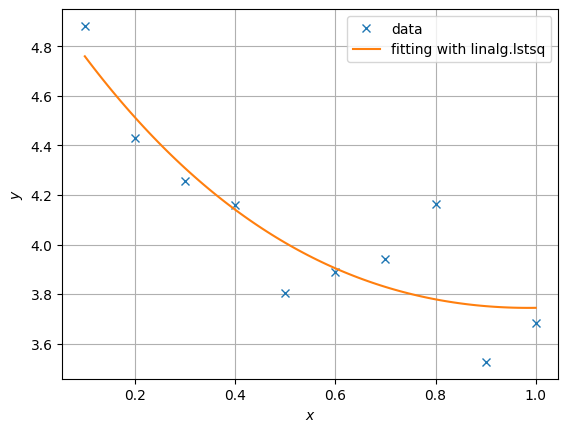

In [48]:
# what we'll plot
xi2 = np.r_[0.1:1:100j]
yi2 = c[0]*np.exp(-xi2) +c[1]*xi2

plt.plot(xi, zi, 'x', label='data')
plt.plot(xi2, yi2, label='fitting with linalg.lstsq')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

### Generalized inverse
Command: **`linalg.pinv`**

## [Decompositions](https://docs.scipy.org/doc/scipy/tutorial/linalg.html#decompositions)

### Eigenvalues and eigenvectors

In [60]:
A = np.array([[1, 2], [3, 4]])
lam, Pmat = slalg.eig(A)
for i in range(len(lam)):
    li = lam[i]
    vi = Pmat[:, i]
    print(f'eigenvalue l{i}={li:.4}, corresponding eigenvector v{i}={vi}')
    verificationi = A.dot(vi) -li*vi
    print(f'verification: expected=0, result={slalg.norm(verificationi)}\n')

eigenvalue l0=(-0.3723+0j), corresponding eigenvector v0=[-0.82456484  0.56576746]
verification: expected=0, result=5.551115123125783e-17

eigenvalue l1=(5.372+0j), corresponding eigenvector v1=[-0.41597356 -0.90937671]
verification: expected=0, result=4.440892098500626e-16



### Singular value decomposition

### LU, Cholesky, QR decomposition

### Schur decomposition

### Interpolative decomposition

## [Matrix functions](https://docs.scipy.org/doc/scipy/tutorial/linalg.html#matrix-functions)

* Exponential and logarithm functions - `linalg.expm` and `linalg.logm`
* Trigonometric functions - `linalg.sinm`, `linalg.cosm`, and `linalg.tanm`
* Hyperbolic trigonometric functions - `linalg.sinhm`, `linalg.coshm`, and `linalg.tanhm`

###  Arbitrary function
Function: `linalg.funm`

In [63]:
import scipy.special as scpsp
rng = np.random.default_rng()
A = rng.random((3,3))
A

array([[0.64939978, 0.03557943, 0.50502985],
       [0.76049683, 0.03831065, 0.60882609],
       [0.46934477, 0.56541568, 0.38172013]])

In [67]:
fx = lambda x: scpsp.jv(0, x) # function

B = slalg.funm(A, fx)
lA = slalg.eigvals(A)
display(fx(lA), slalg.eigvals(B))

array([0.61447863+0.j, 0.99991859+0.j, 0.98325717+0.j])

array([0.61447863+0.j, 0.99991859+0.j, 0.98325717+0.j])

## [Special matrices](https://docs.scipy.org/doc/scipy/tutorial/linalg.html#special-matrices)

| Type               | Function                                                                                                 | Description                               |
|--------------------|----------------------------------------------------------------------------------------------------------|-------------------------------------------|
| block diagonal     | [scipy.linalg.block_diag](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.block_diag.html)       | Create a block diagonal matrix from the provided arrays.    |
| circulant          | [scipy.linalg.circulant](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.circulant.html)       | Create a circulant matrix.                |
| companion          | [scipy.linalg.companion](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.companion.html)       | Create a companion matrix.                |
| convolution        | [scipy.linalg.convolution_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.convolution_matrix.html) | Create a convolution matrix.          |
| Discrete Fourier   | [scipy.linalg.dft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.dft.html)                | Create a discrete Fourier transform matrix. |
| Fiedler            | [scipy.linalg.fiedler](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.fiedler.html)         | Create a symmetric Fiedler matrix.        |
| Fiedler Companion  | [scipy.linalg.fiedler_companion](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.fiedler_companion.html) | Create a Fiedler companion matrix. |
| Hadamard           | [scipy.linalg.hadamard](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.hadamard.html)       | Create a Hadamard matrix.                |
| Hankel             | [scipy.linalg.hankel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.hankel.html)           | Create a Hankel matrix.                  |
| Helmert            | [scipy.linalg.helmert](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.helmert.html)       | Create a Helmert matrix.                |
| Hilbert            | [scipy.linalg.hilbert](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.hilbert.html)       | Create a Hilbert matrix.                |
| Inverse Hilbert    | [scipy.linalg.invhilbert](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.invhilbert.html) | Create the inverse of a Hilbert matrix.  |
| Leslie             | [scipy.linalg.leslie](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.leslie.html)         | Create a Leslie matrix.                 |
| Pascal             | [scipy.linalg.pascal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.pascal.html)         | Create a Pascal matrix.                 |
| Inverse Pascal     | [scipy.linalg.invpascal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.invpascal.html) | Create the inverse of a Pascal matrix.  |
| Toeplitz           | [scipy.linalg.toeplitz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.toeplitz.html)     | Create a Toeplitz matrix.               |
| Van der Monde      | [numpy.vander](https://numpy.org/devdocs/reference/generated/numpy.vander.html)                        | Create a Van der Monde matrix.          |
